In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from datetime import timedelta

In [5]:
df = pd.read_csv('Sprint_results_Player8_Game2_randomforest.csv') #Results in chunks of 1 sec
df_raw = pd.read_csv('matrix_Player_8_game_2_QuarterSplit.csv') #Raw Data in normal type

In [6]:
df = df.drop(columns = ['Unnamed: 0'])

In [7]:
Action = df.Action.to_numpy()
timeLine = df.timeLine.to_numpy()

In [8]:
Sprint = False;

SprintStart = []
SprintStop = []

for i in range(0,len(Action)):
    if Sprint == False and Action[i] == 1:
        SprintStart.append(timeLine[i])
        Sprint = True
    elif Sprint == True and Action[i] == False:
        SprintStop.append(timeLine[i])
        Sprint = False
        
Deleted = 0       

for i in range(0,len(SprintStart),1):
    if (SprintStop[i-Deleted] - SprintStart[i-Deleted]) <= 3:
        SprintStart.pop(i-Deleted)
        SprintStop.pop(i-Deleted)
        Deleted = Deleted + 1
        
print(len(SprintStart))

108


In [9]:
df_Sync = pd.read_csv('Sync_match_2.csv')
df_Sync_Player = df_Sync.loc[df_Sync["Player"] == 8]
Sync = df_Sync_Player[["Video","Matlab"]].to_numpy()
Sync

array([[ 839.16, 3390.4 ],
       [2817.08, 5838.5 ],
       [3648.6 , 6683.7 ]])

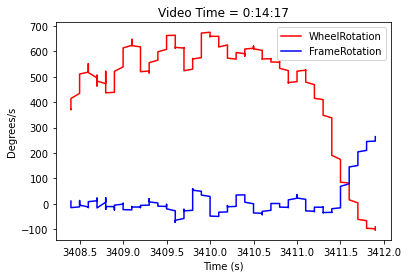

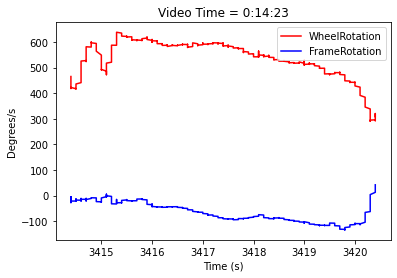

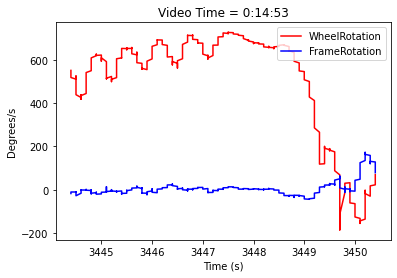

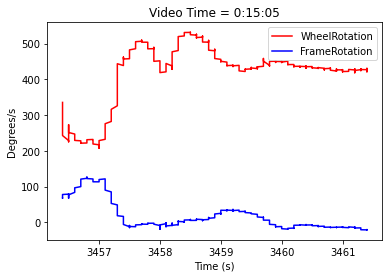

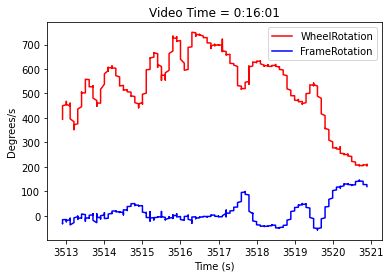

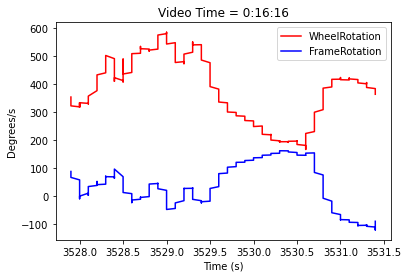

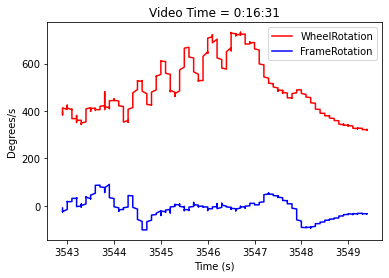

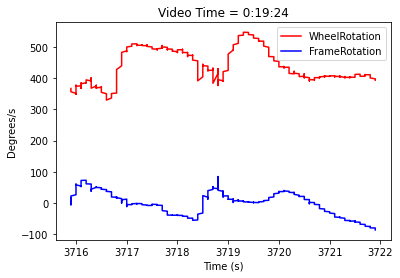

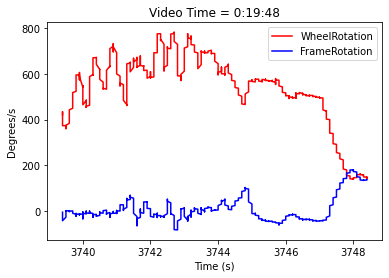

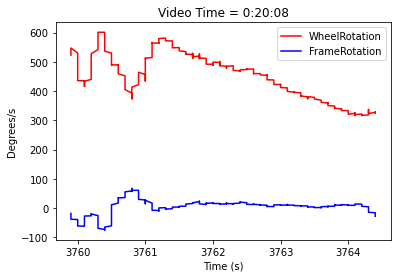

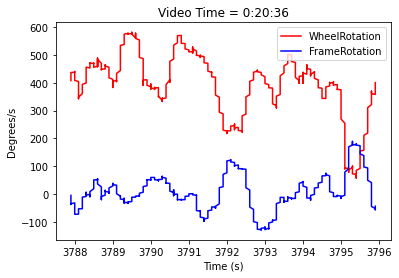

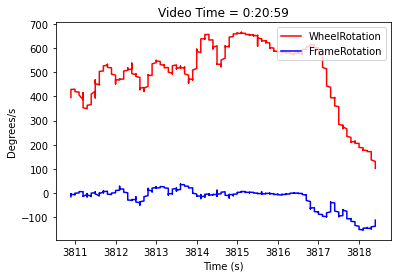

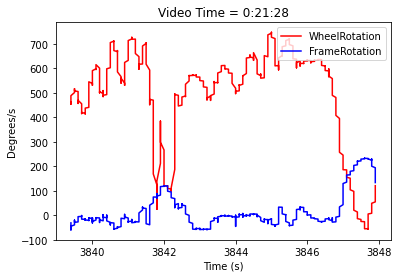

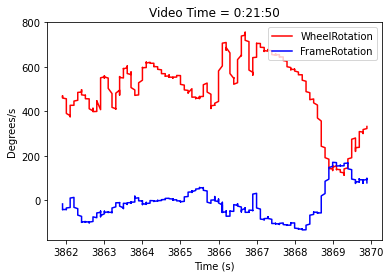

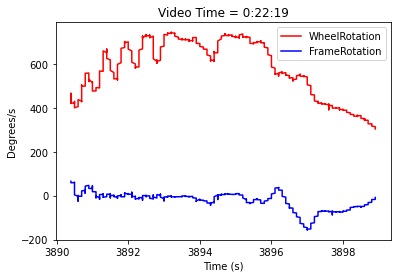

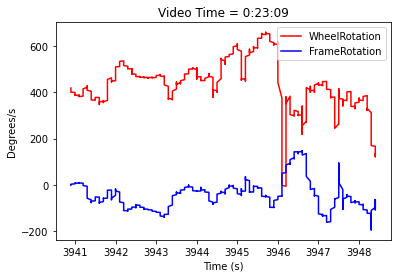

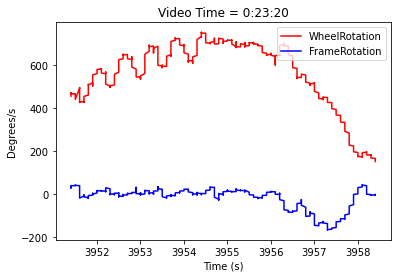

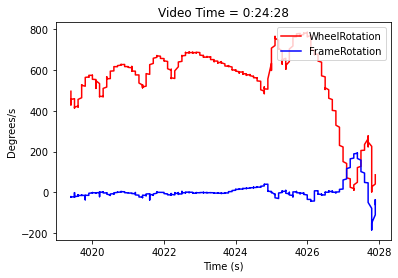

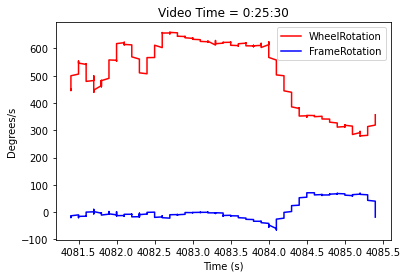

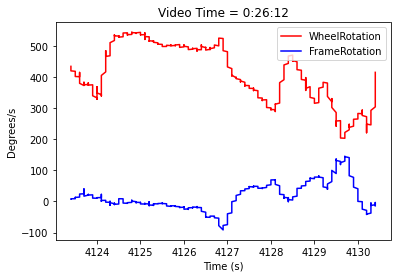

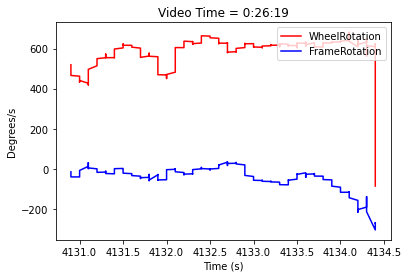

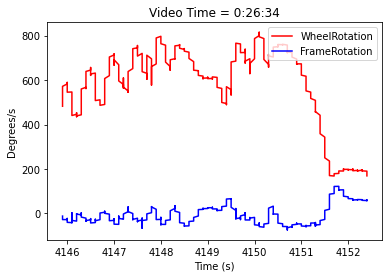

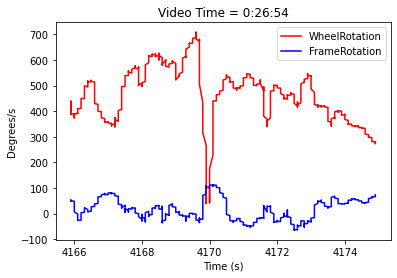

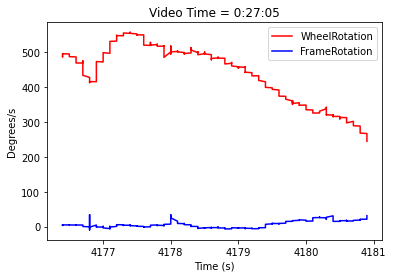

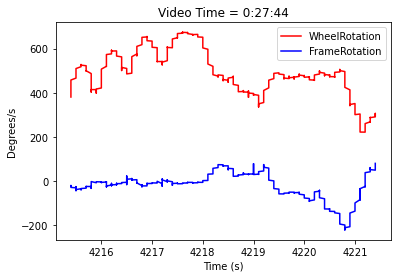

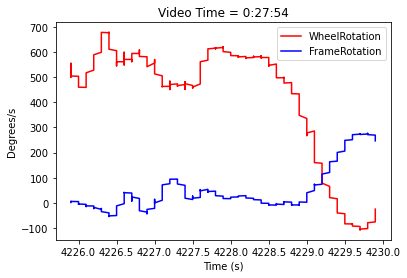

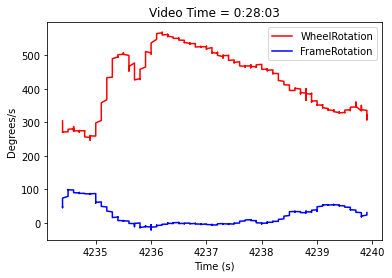

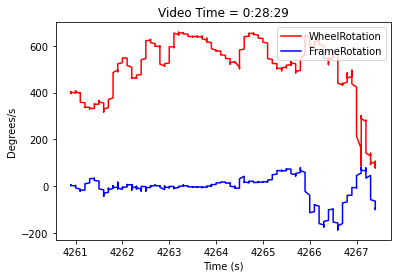

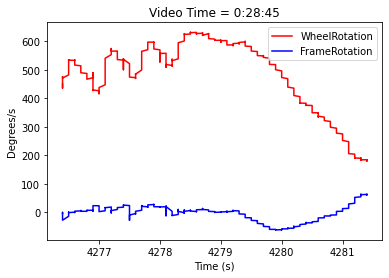

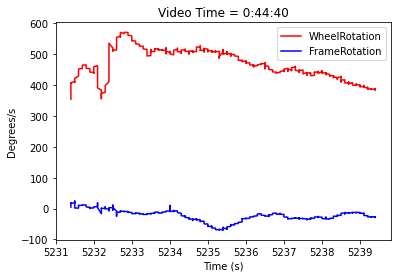

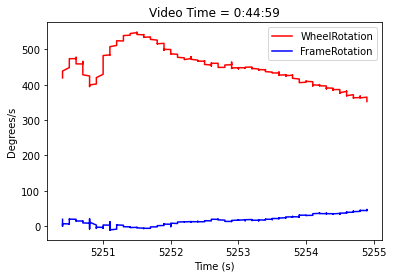

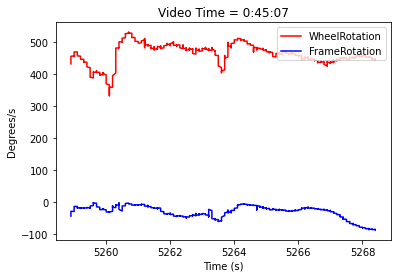

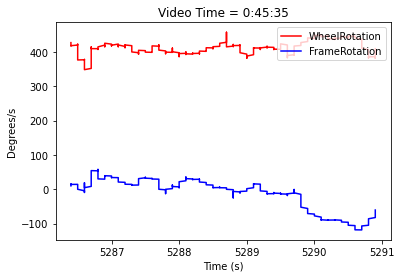

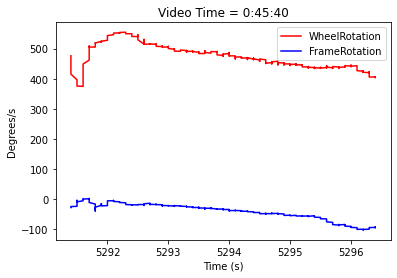

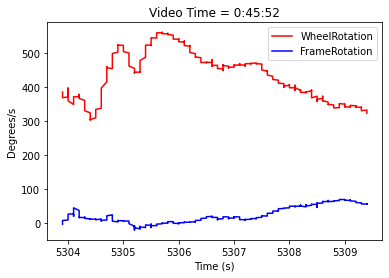

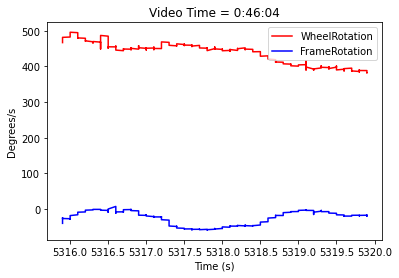

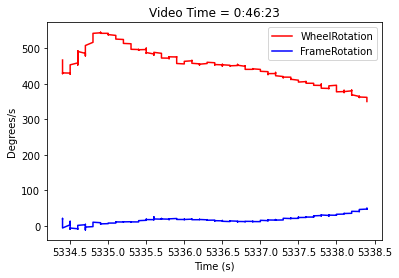

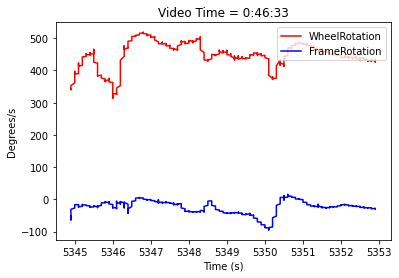

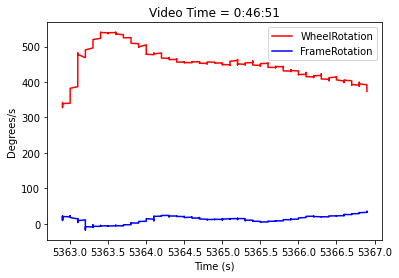

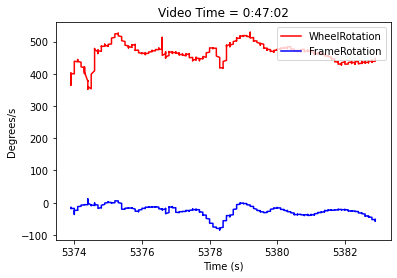

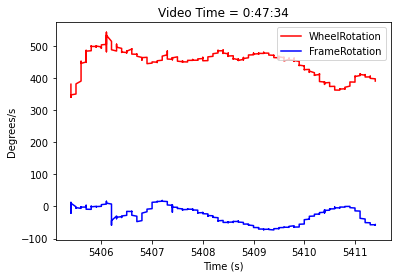

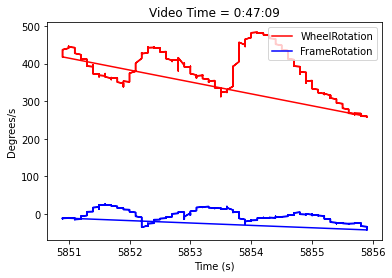

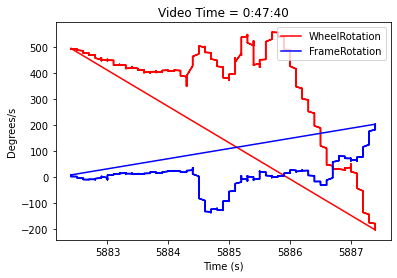

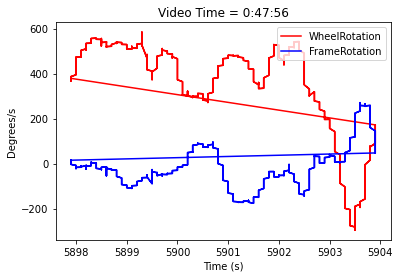

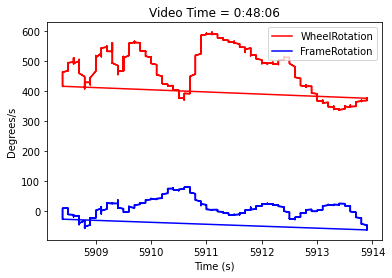

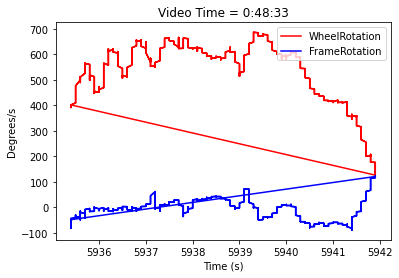

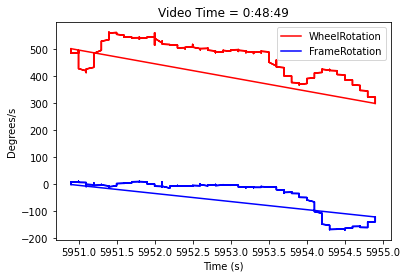

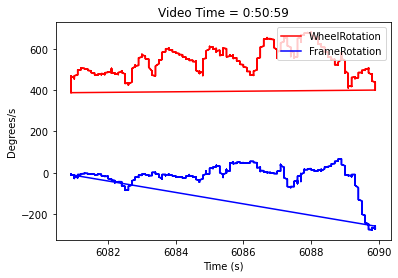

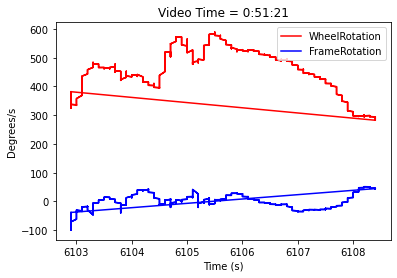

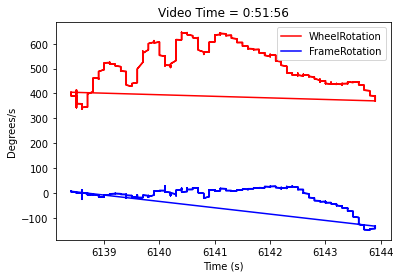

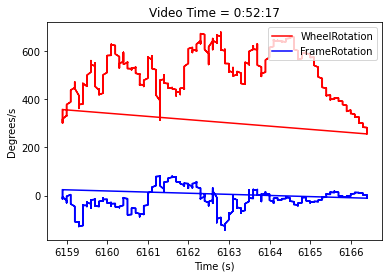

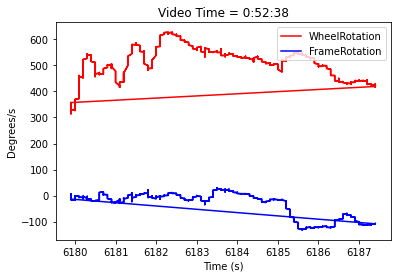

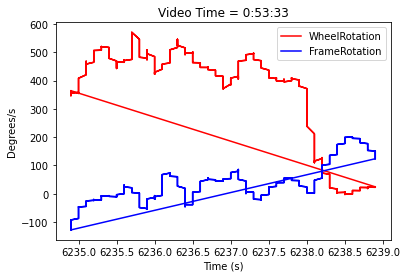

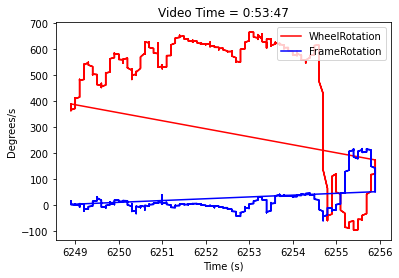

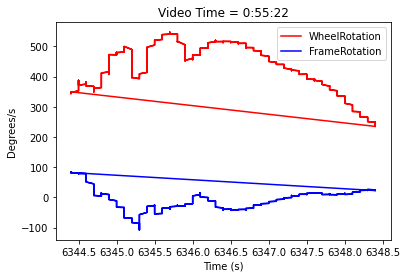

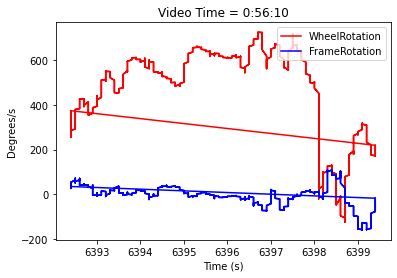

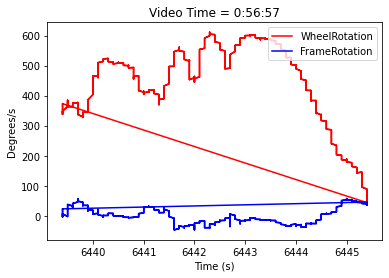

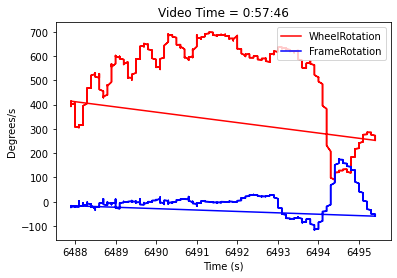

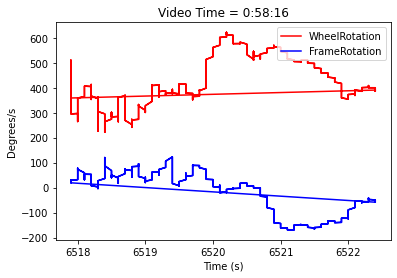

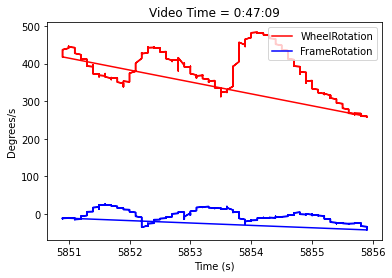

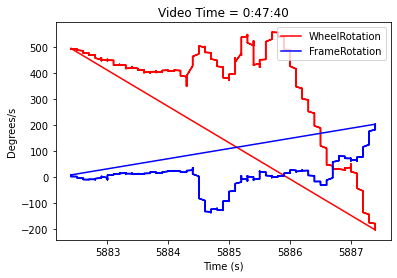

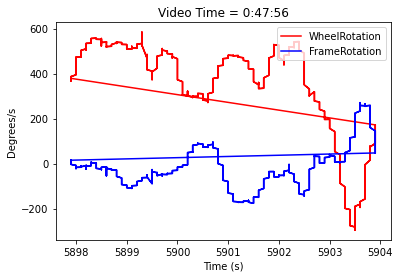

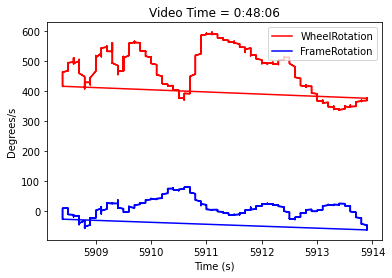

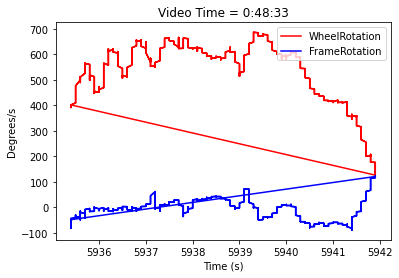

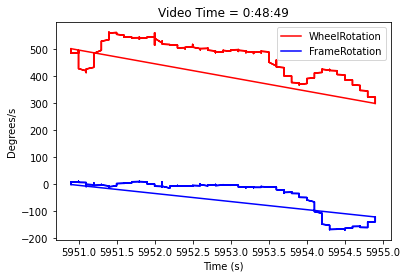

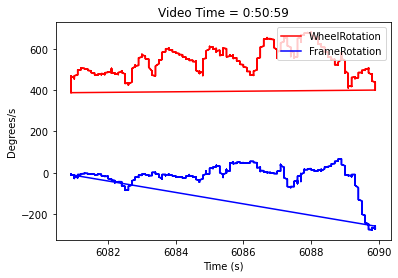

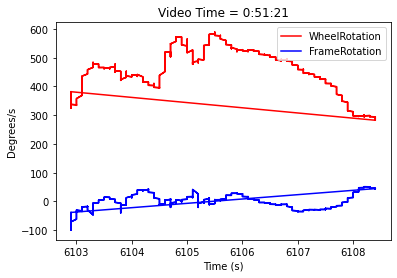

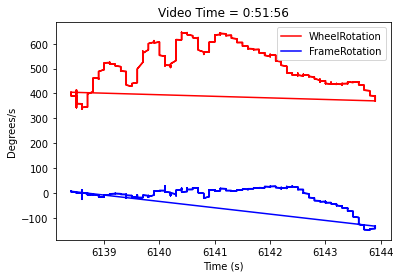

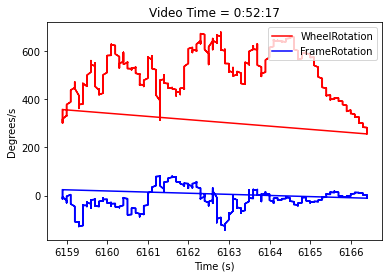

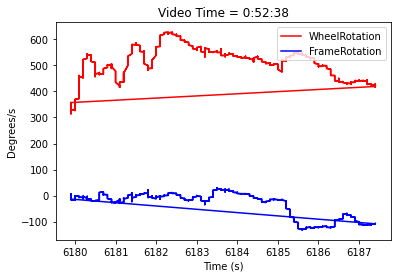

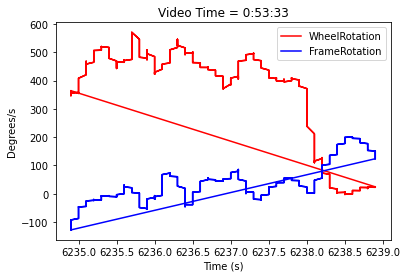

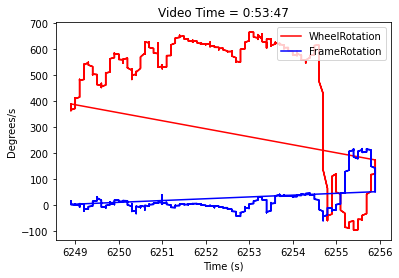

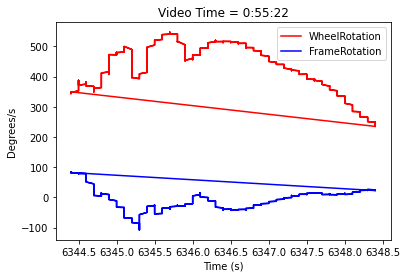

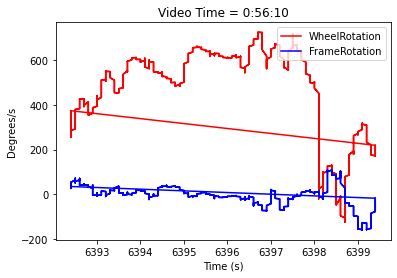

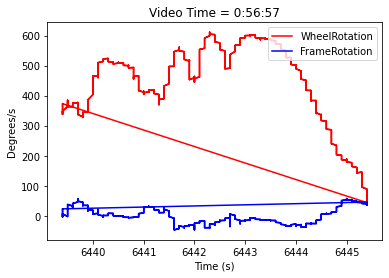

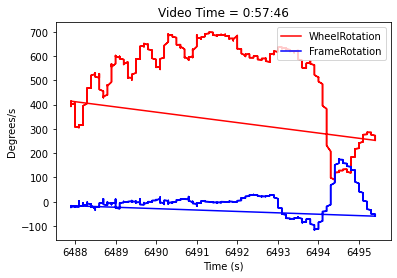

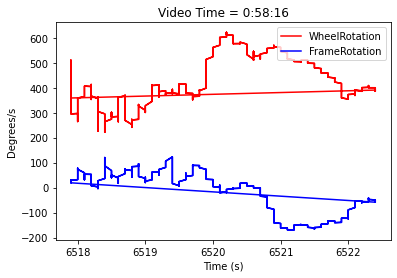

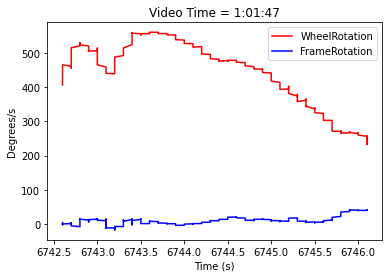

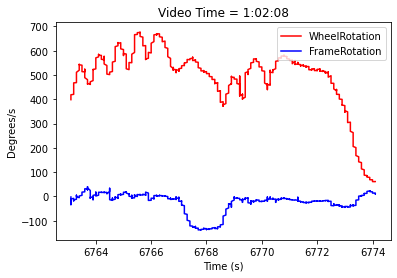

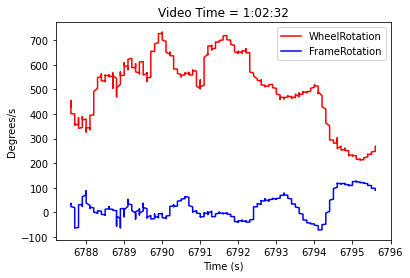

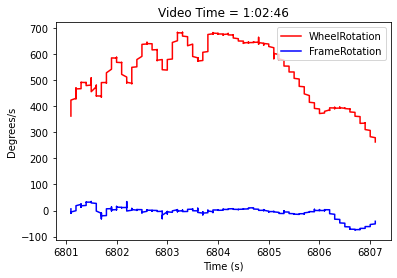

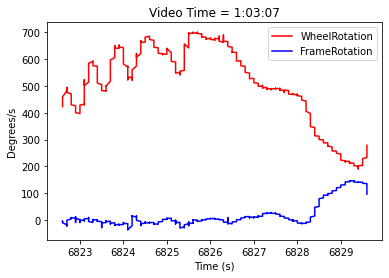

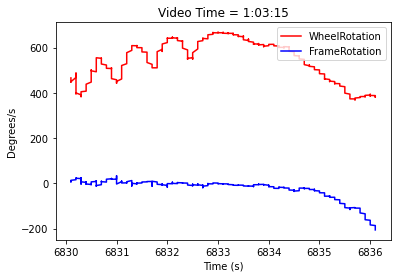

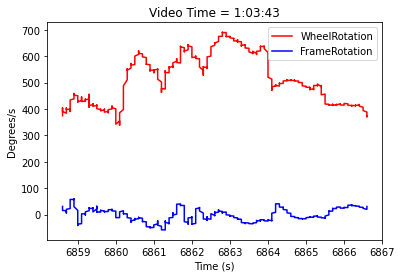

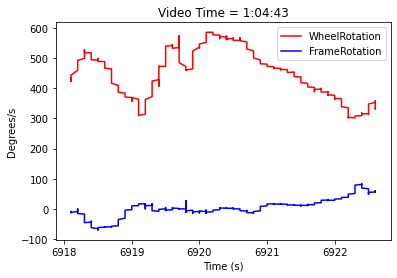

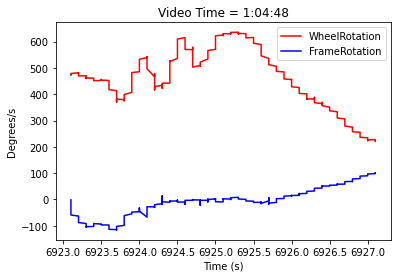

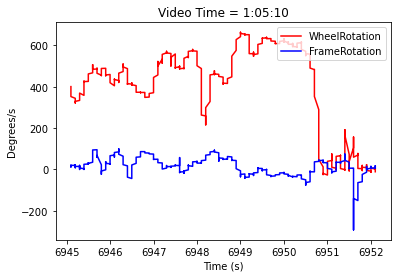

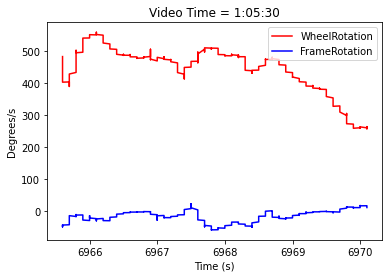

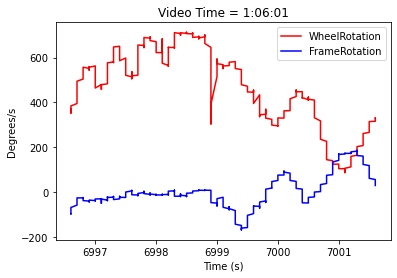

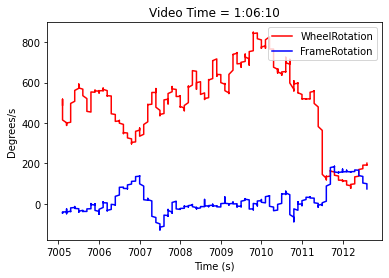

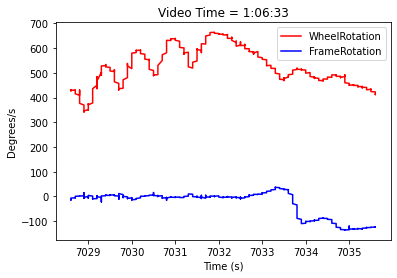

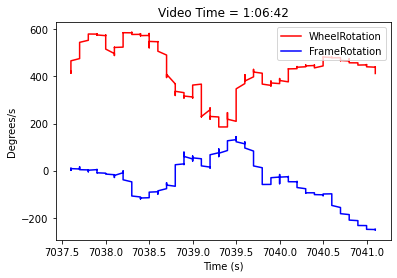

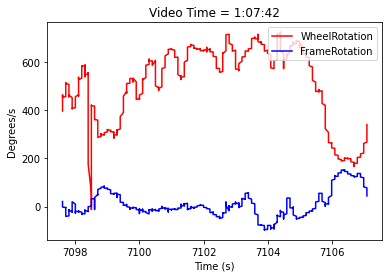

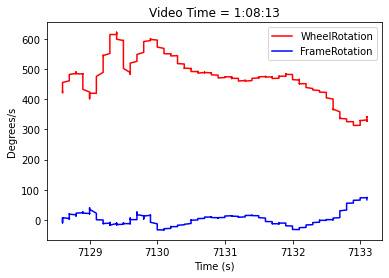

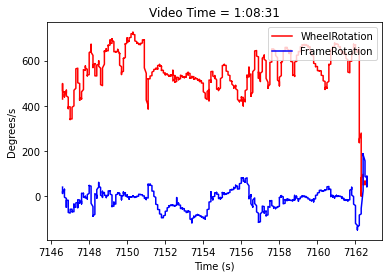

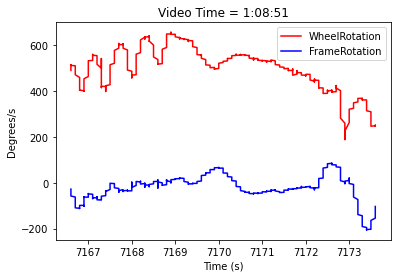

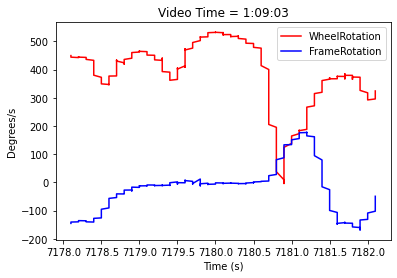

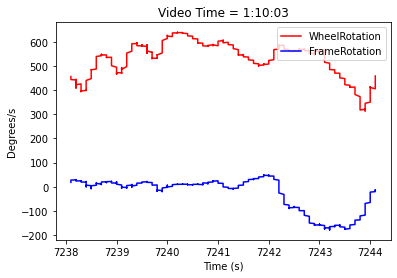

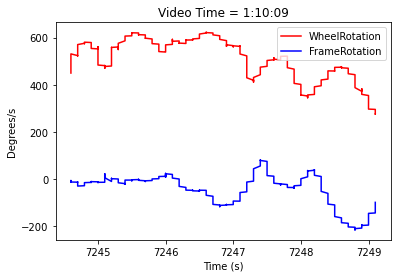

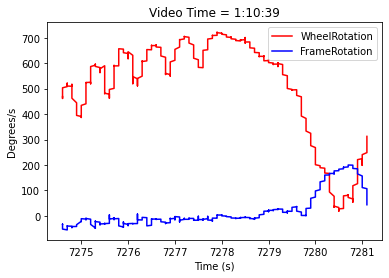

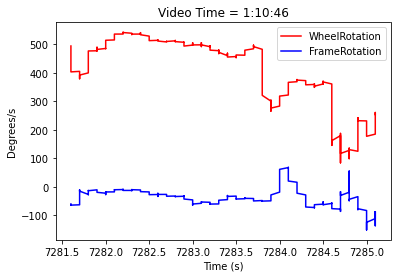

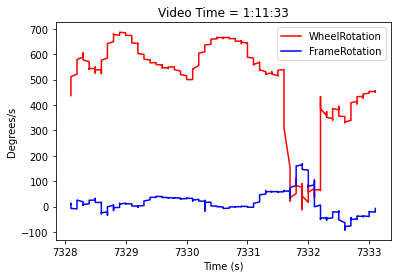

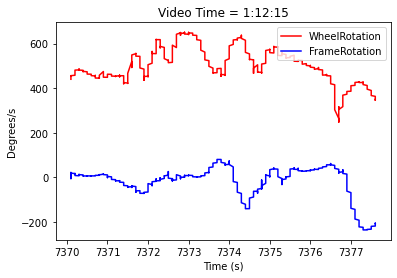

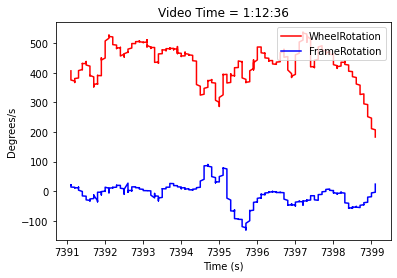

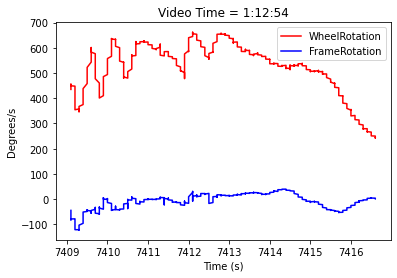

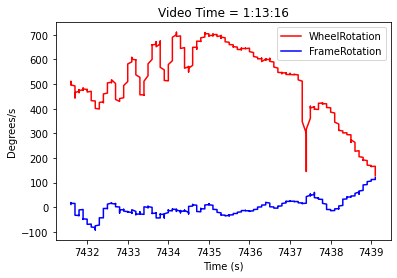

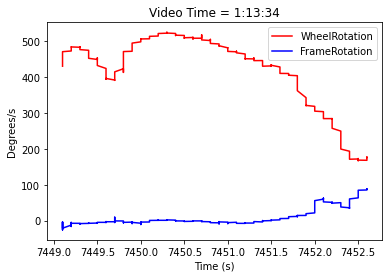

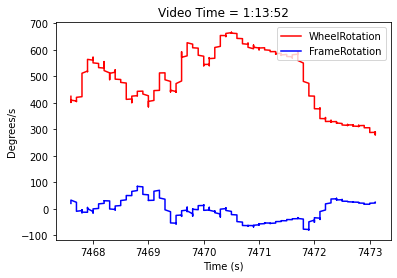

In [10]:
for i in range(0,len(SprintStart)):
    plt.plot(df_raw.timeLine[df_raw['timeLine'].between(SprintStart[i], SprintStop[i])],df_raw.wheelRotationalSpeedX[df_raw['timeLine'].between(SprintStart[i], SprintStop[i])], 'r',
            df_raw.timeLine[df_raw['timeLine'].between(SprintStart[i], SprintStop[i])],df_raw.frameRotationalSpeedZ[df_raw['timeLine'].between(SprintStart[i], SprintStop[i])], 'b')
    
    Start = SprintStart[i]
    
    if (Start) < Sync[0][1]:
        Videotime = 0;
    elif (Start) < Sync[1][1]:
        Videotime = Sync[0][0] + ((Start)-Sync[0][1])
    elif (Start) < Sync[2][1]:
        Videotime = Sync[1][0] + ((Start)-Sync[1][1])
    else:
        Videotime = Sync[2][0] + ((Start)-Sync[2][1]) 
        
    plt.title("Video Time = " + str(timedelta(seconds = int(Videotime))))
    plt.xlabel('Time (s)')
    plt.ylabel('Degrees/s')
    plt.legend(["WheelRotation","FrameRotation"], loc = 1)
    plt.show()

In [11]:
print(len(SprintStart))

108
